# Лабораторная работа №1
## по дисциплине *Моделирование инженерных задач*
Работу выполнил: студент гр. **М1О-414Бки-19** *Эбиоле Мандомбо Белтран*

**Вариант 4**

В данном варианте для анализа представлены данные о качестве белого и красного вин и их характеристик, таких как кислотность, количество сахара, плотность, крепкость и т.д. Нашей целью является анализ этих данных и выявление закономерностей.

In [17]:
# Загрузка данных из файлов
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Для начала проанализируем данные о красном вине

dataset = pd.read_csv('datasets/winequality-red.csv', sep=';')    #Загрузка датасета с параметрами красного вина
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


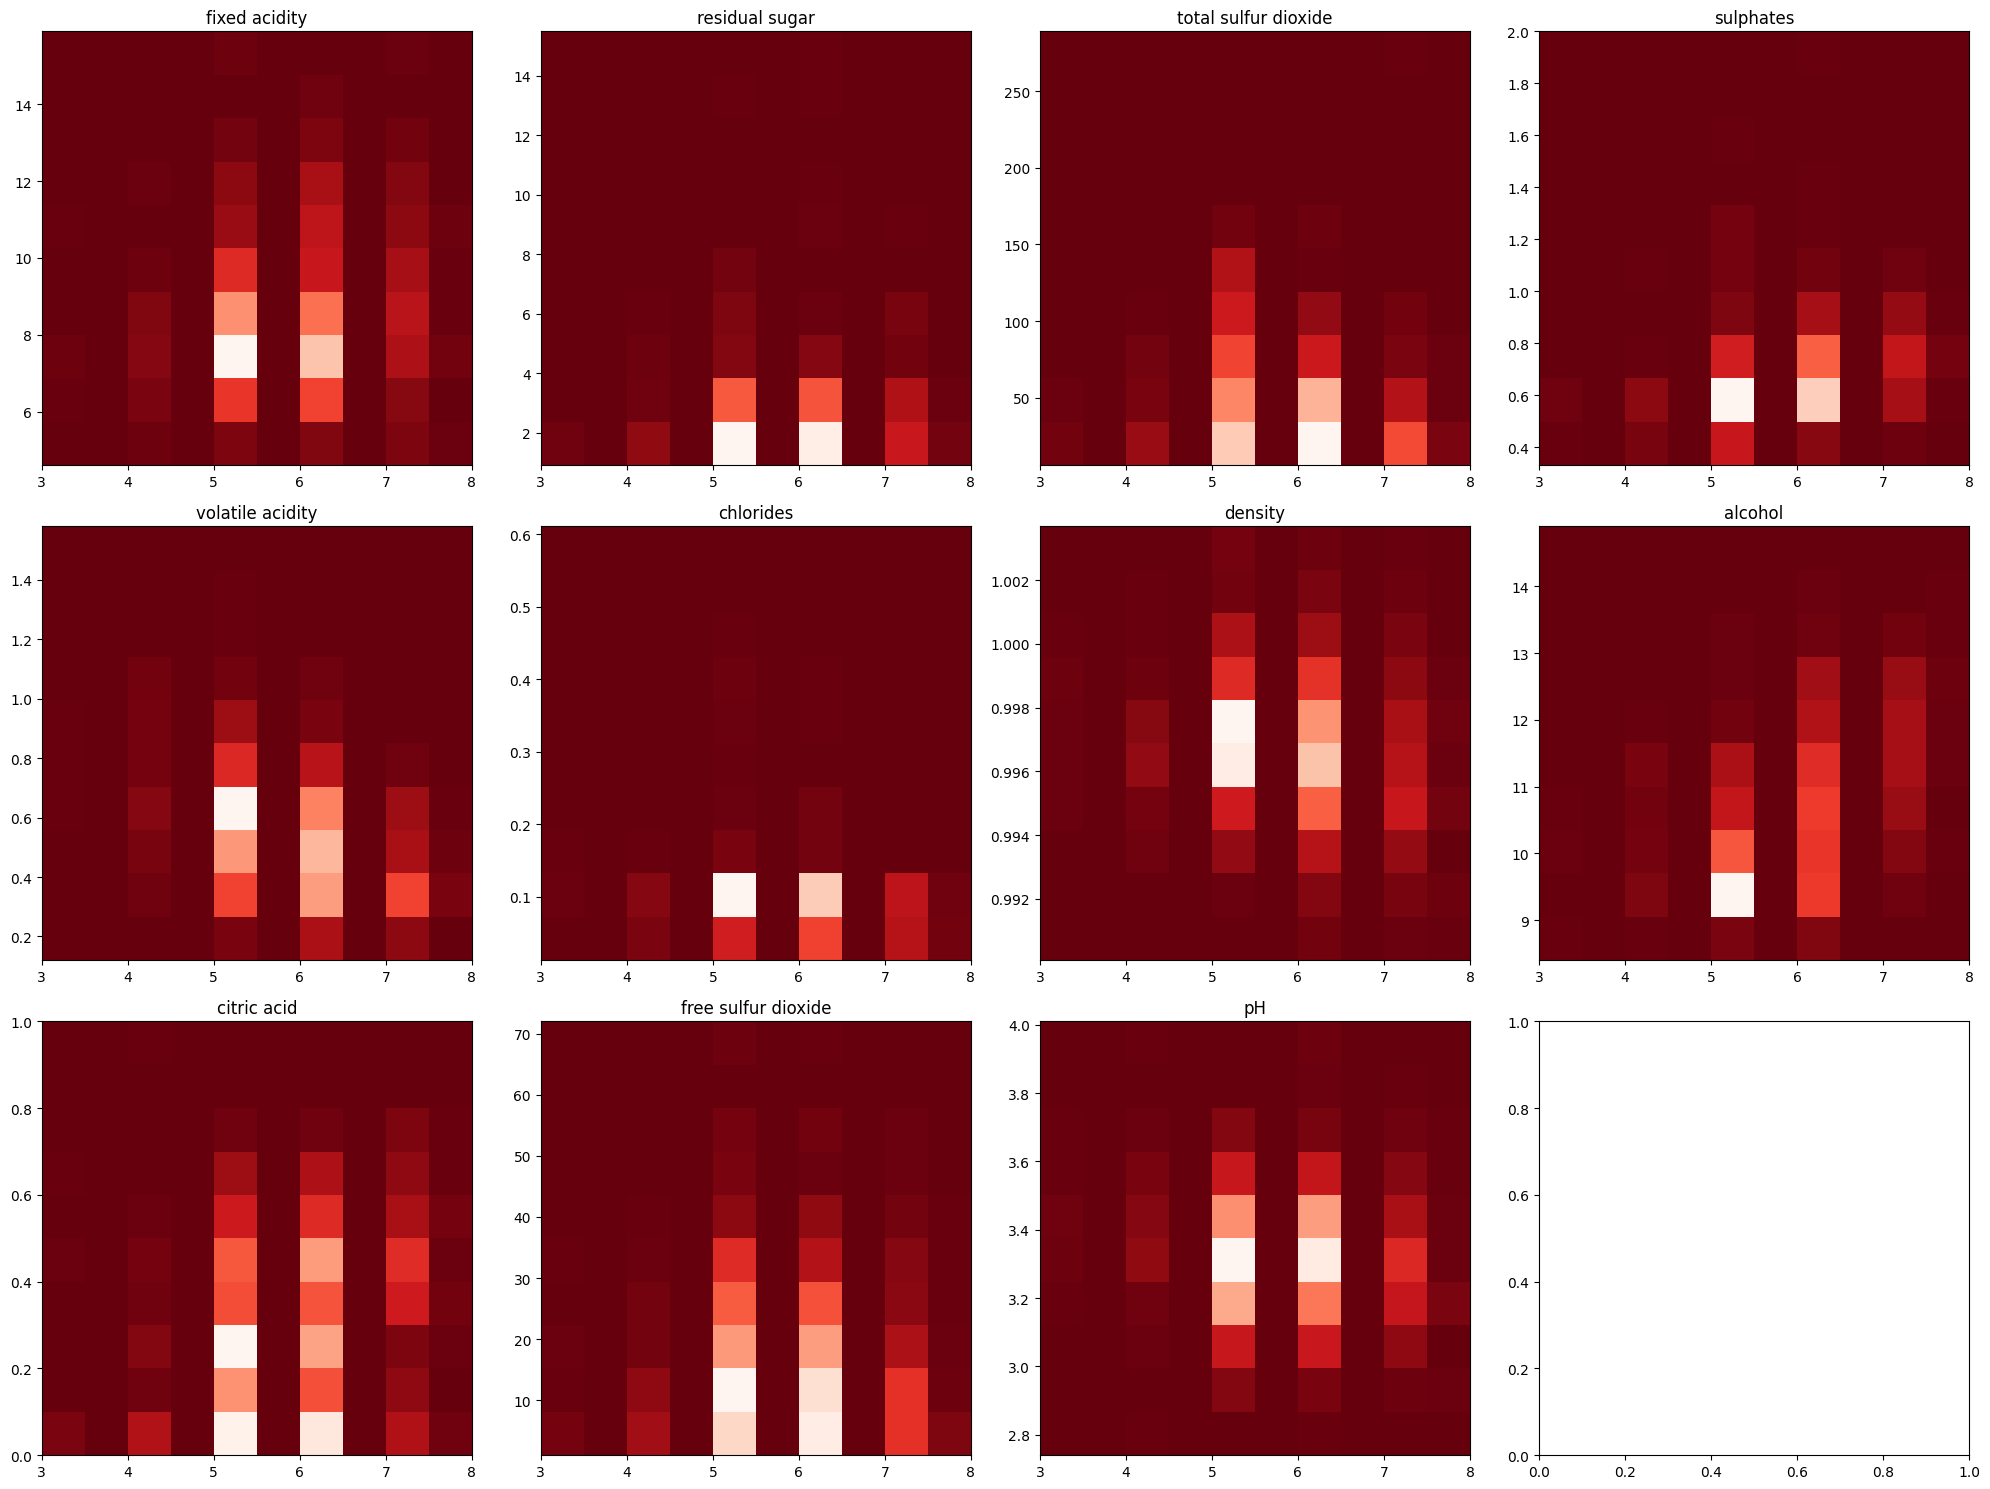

In [18]:
# Построим графики распределения параметров в зависимости от качества
%matplotlib inline
fig, axs = plt.subplots(3, 4, figsize=(20,15))

for i in range(11):
    x = i % 3
    y = i // 3
    axs[x, y].hist2d(dataset['quality'], dataset[dataset.columns[i]], cmap=plt.cm.Reds_r)
    axs[x, y].set_title(dataset.columns[i])
fig.tight_layout()

plt.show()

Из этих графиков видны определенные закономерности, к примеру:
 - в качественных винах чаще всего меньше хлоридов
 - уровень лимонной кислоты практически не влияет на качество вина
 - концентрация диоксидов серы меньше в более качественных винах
 - концентрация сульфатов меньше в более качественных винах
 - концентрация алкоголя больше в более качественных винах

В общем, зависимость качества можно сформулировать так - более качественным вином в среднем считается вино с низким содержанием примесей и высокой концентрацией алкоголя.

In [19]:
# Построим корреляционную матрицу для того, чтобы определить самые важные параметры для модели
corr_matrix = dataset.corr()
abs(corr_matrix['quality']).sort_values(ascending=False)[1:6]

alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
Name: quality, dtype: float64

В итоге получили топ-5 самых важных параметров. На первом месте стоит концентрация алкоголя. Коэффициенты корреляции достаточно низкие, что означает, что построить точную модель скорее всего не удастся. Однако повышения точности можно достигнуть другим путем - изменением задачи. Вместо поиска точного значения качества вина (числа от 0 до 10) можно свести задачу регрессии к задаче классификации. Поставим задачу таким образом - определоить среди всех вин наиболее качественные, к примеру с оценкой >=7. Для решения этой задачи необходимо поменять представления столбца с качеством.

In [20]:
quality_bins = (2,6.5,8)    #Больше 6.5 - отличное вино, иначе - обычное вино
qualities = ['normal','elite']
categories = pd.cut(dataset['quality'], quality_bins, labels = qualities)
dataset['quality'] = categories
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,normal
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,normal
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,normal
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,normal
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,normal


Теперь рассмотрим еще раз зависимости качества от параметров:

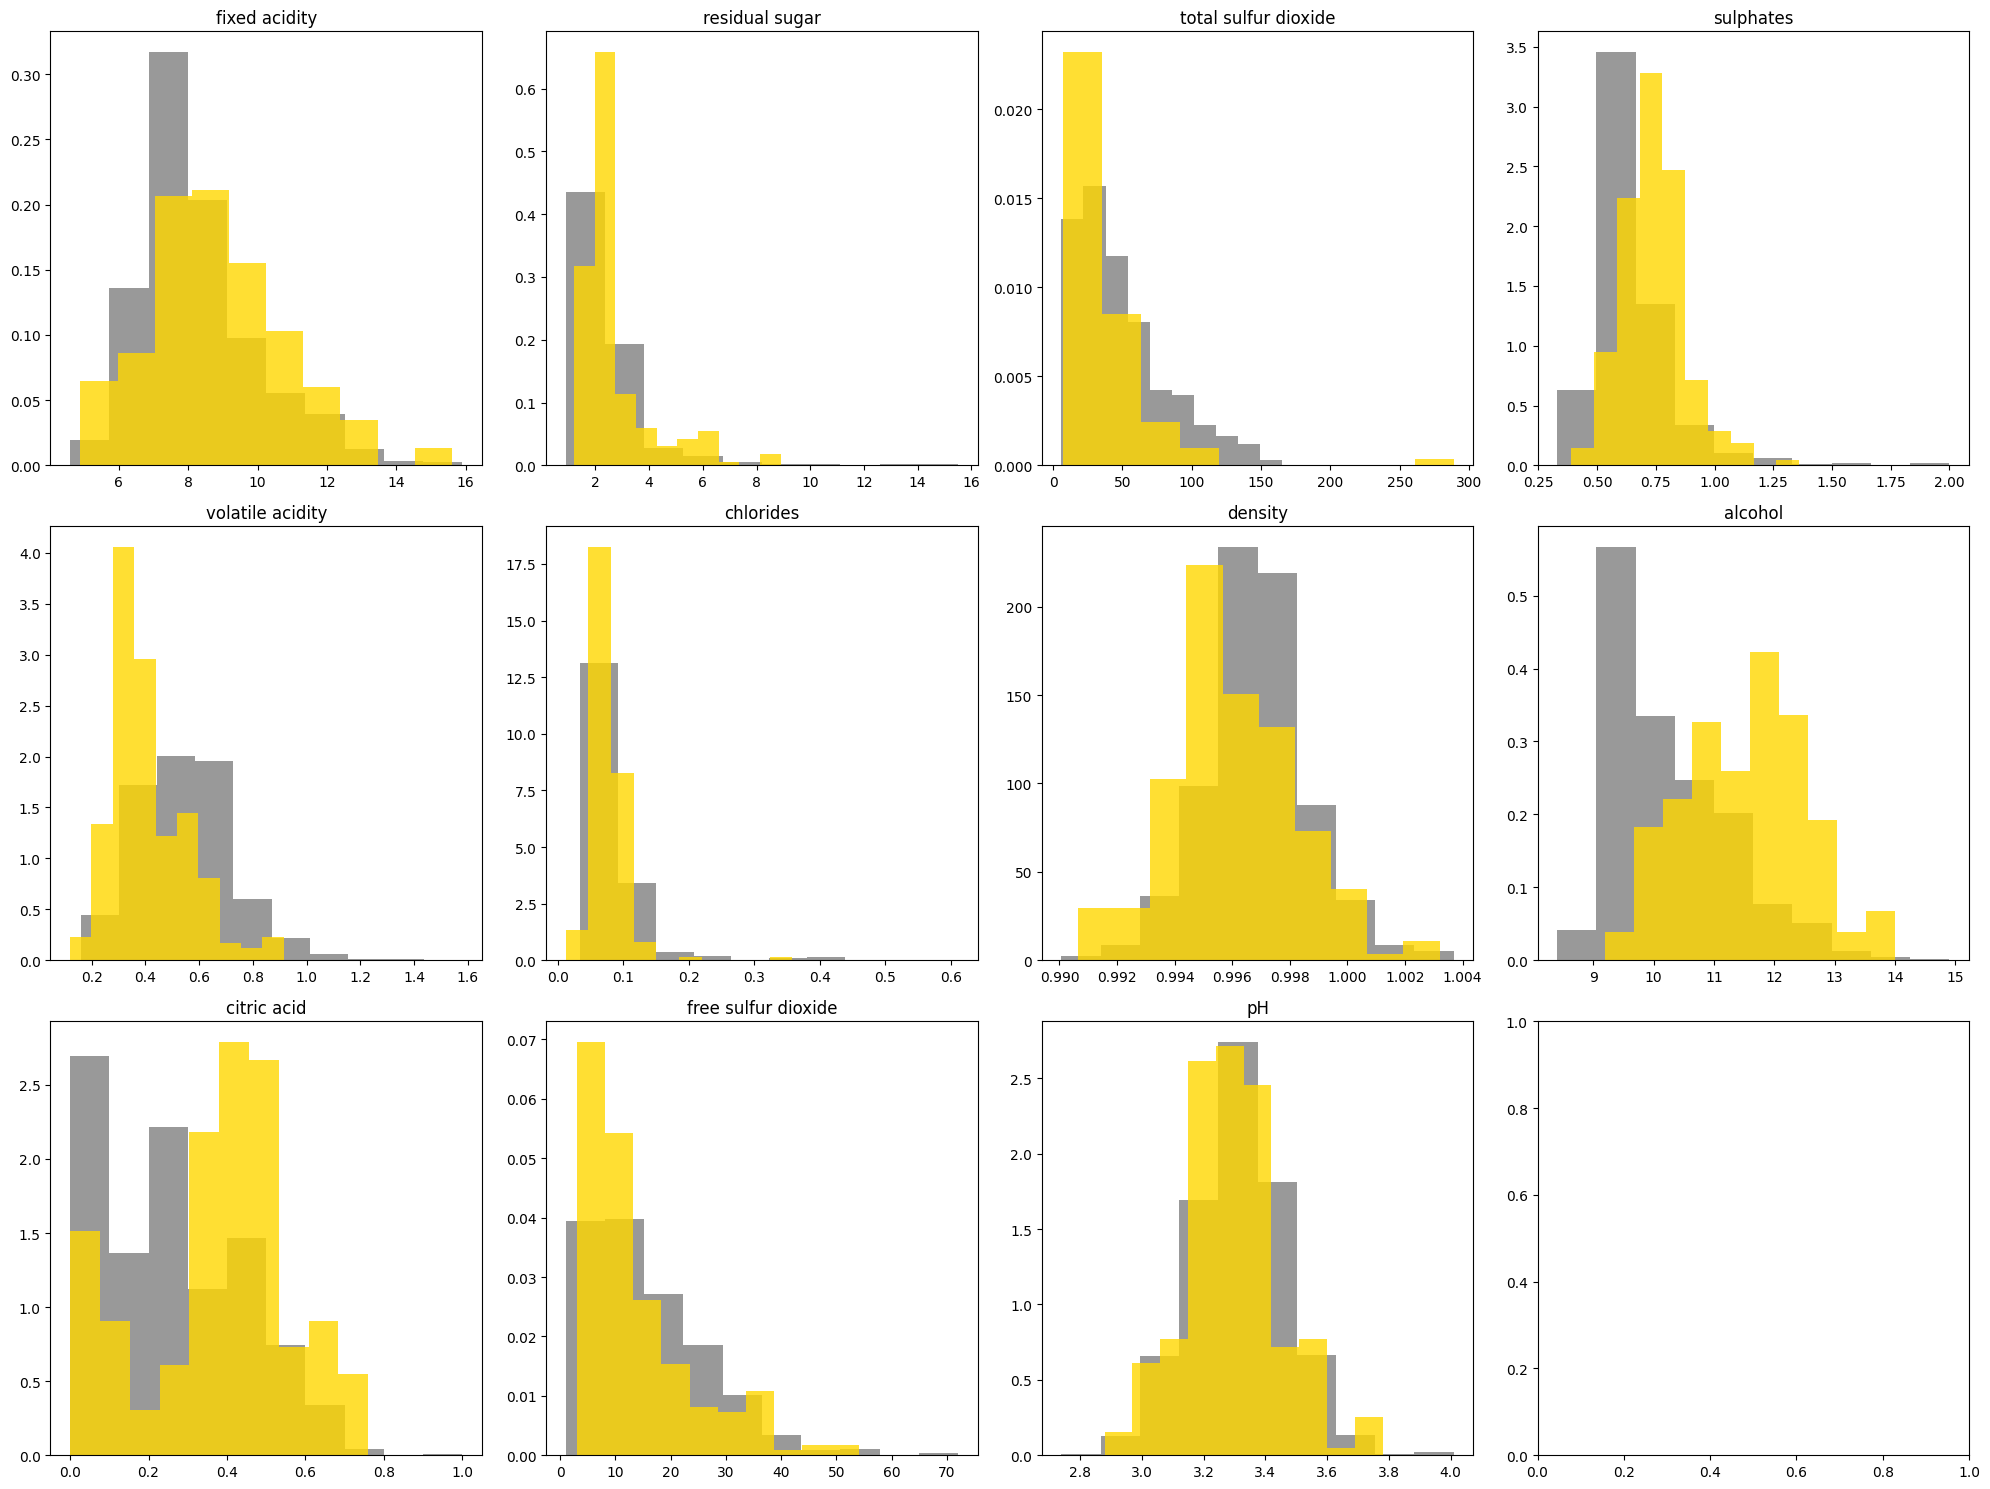

In [21]:
%matplotlib inline
fig, axs = plt.subplots(3, 4, figsize=(20,15))

for i in range(11):
    x = i % 3
    y = i // 3

    axs[x, y].hist(dataset[dataset["quality"] == "normal"][dataset.columns[i]], color = 'grey', alpha = 0.8, density = True, stacked = True)
    axs[x, y].hist(dataset[dataset["quality"] == "elite"][dataset.columns[i]], color = 'gold', alpha = 0.8, density = True, stacked = True)
    axs[x, y].set_title(dataset.columns[i])
fig.tight_layout()

plt.show()

По этим графикам видно следующее:
 - у качественных вин некоторые параметры ближе к некоторой "золотой середине", а именно: лимонная кислота, диоксиды серы, хлориды.
 - как ранее и было замечено, у качественных вин выше концентрация алкоголя

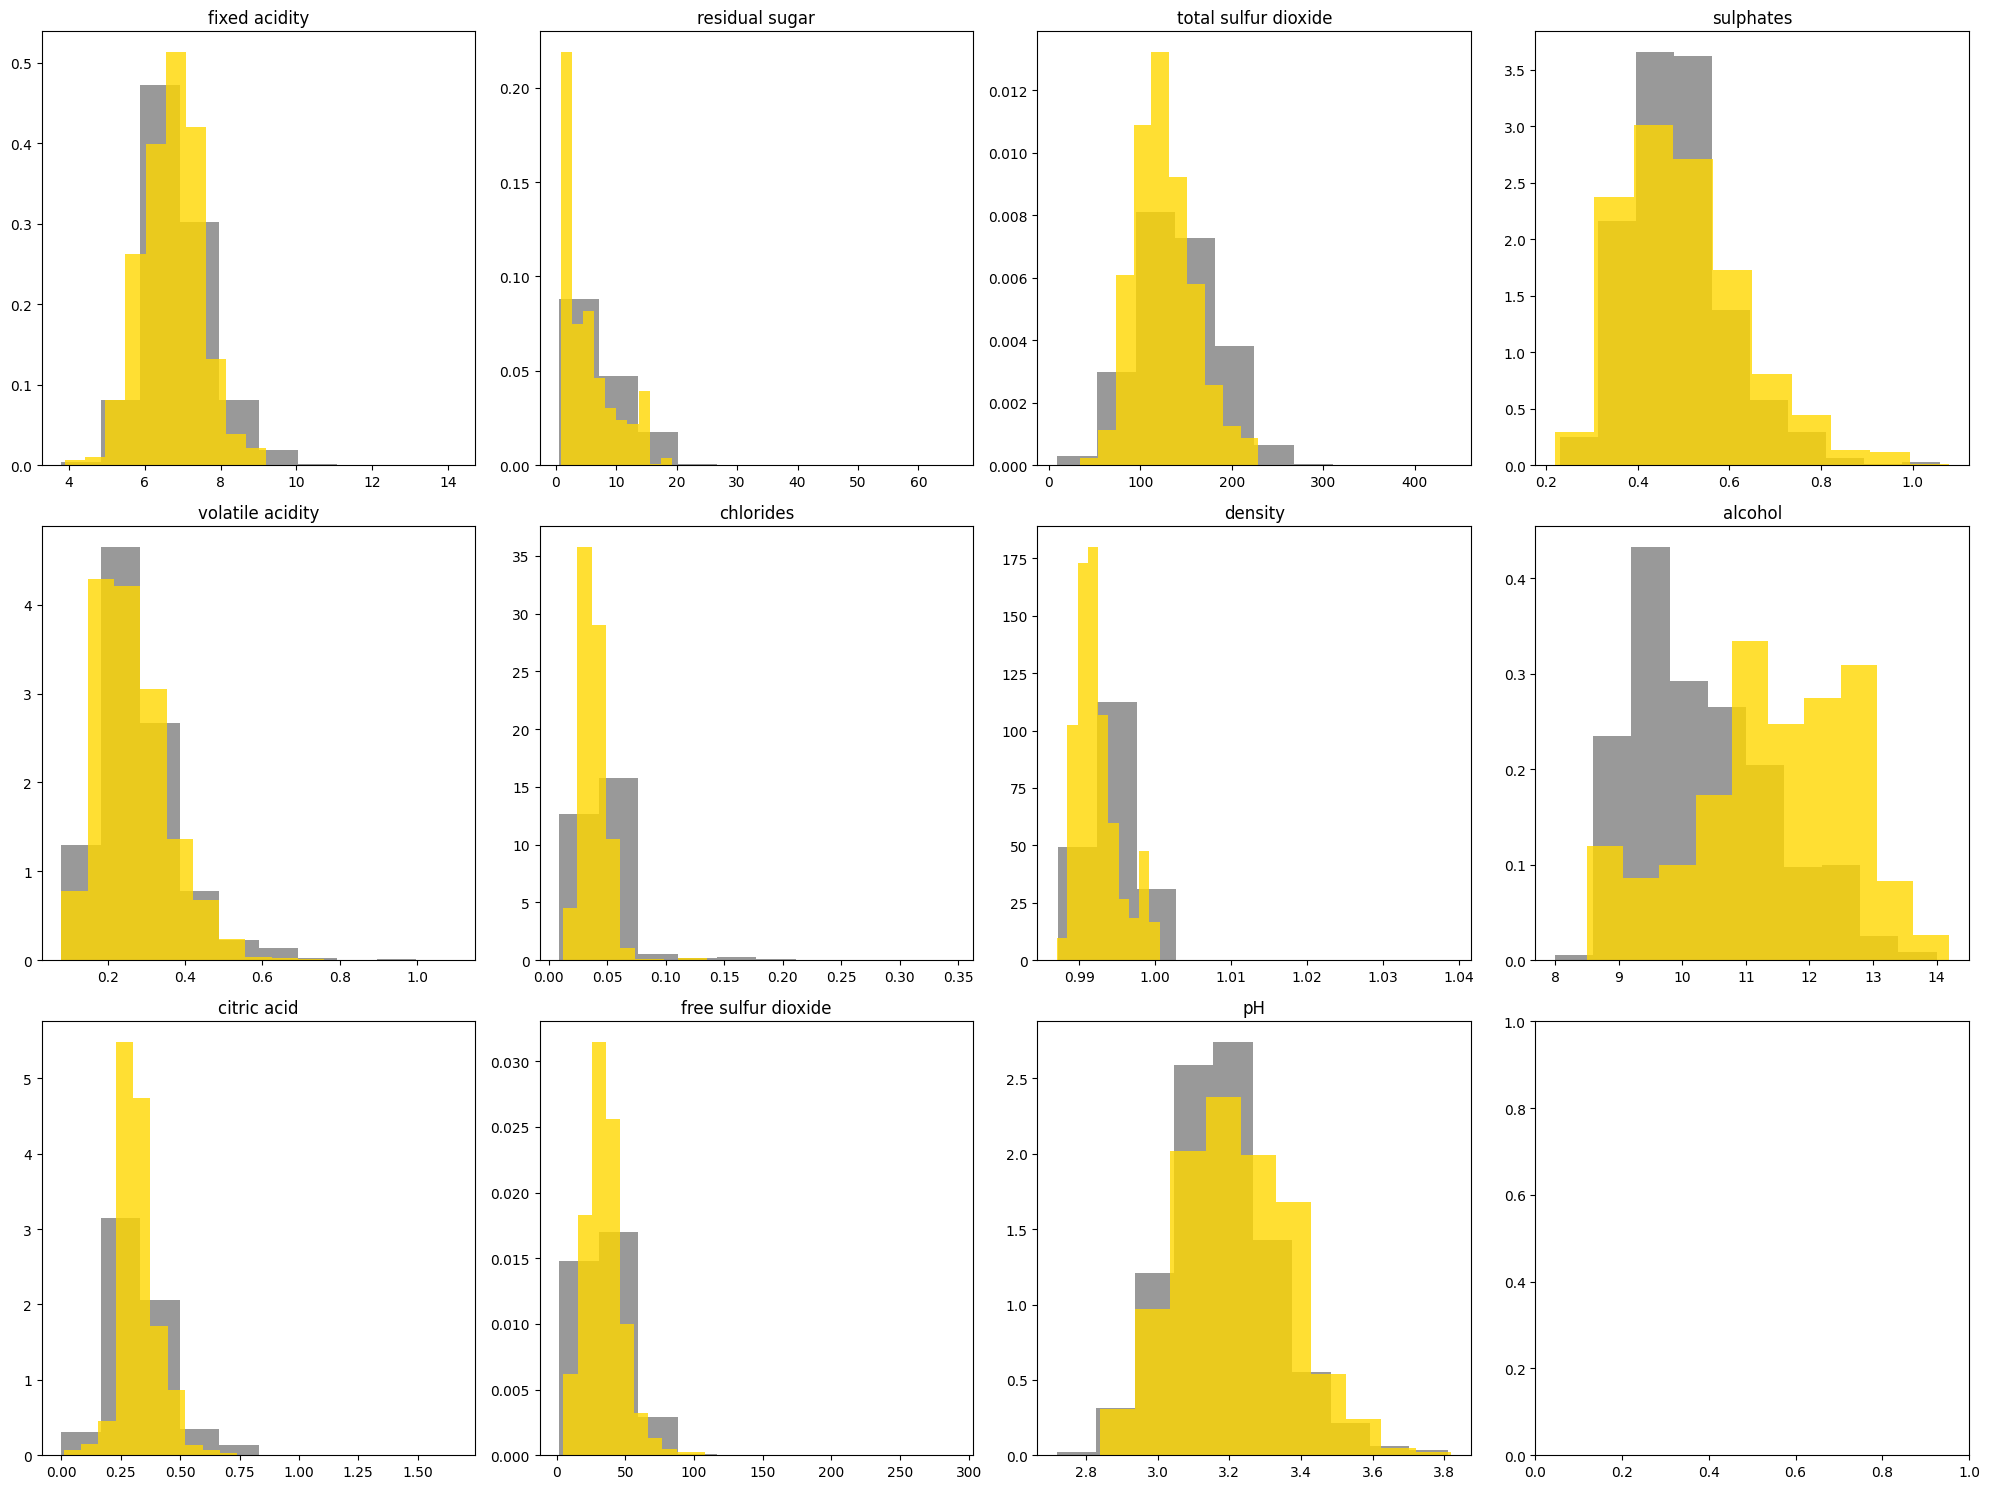

In [23]:
# Рассмотрим зависимости для белого вина
white_dataset = pd.read_csv('datasets/winequality-white.csv', sep=';')    #Загрузка датасета с параметрами красного вина

quality_bins = (2,6.5,8)    #Больше 6.5 - отличное вино, иначе - обычное вино
qualities = ['normal','elite']
categories = pd.cut(white_dataset['quality'], quality_bins, labels = qualities)
white_dataset['quality'] = categories

%matplotlib inline
fig, axs = plt.subplots(3, 4, figsize=(20,15))

for i in range(11):
    x = i % 3
    y = i // 3

    axs[x, y].hist(white_dataset[white_dataset["quality"] == "normal"][white_dataset.columns[i]], color = 'grey', alpha = 0.8, density = True, stacked = True)
    axs[x, y].hist(white_dataset[white_dataset["quality"] == "elite"][white_dataset.columns[i]], color = 'gold', alpha = 0.8, density = True, stacked = True)
    axs[x, y].set_title(white_dataset.columns[i])
fig.tight_layout()

plt.show()

В ходе лабораторной работы мною был проведен анализ исходных данных, была поставлена задача для следующей лабораторной работы, проведена предварительная обработка данных. Были выявлены параметры, влияние которых на итоговую оценку вина больше всего.